In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(nnet)

# Load Adult data

In [32]:
obj.merge1 <- readRDS("/data3/cyx/ForDatabase0606/Adult.Heart.integrated.rds")

In [39]:
obj.merge1@meta.data <- obj.merge1@meta.data[1:18]

In [28]:
obj.Wang <- readRDS("/data1/chenyx/Compitition/processed/Wang.rds")

In [43]:
dataobj <- merge(obj.merge1, obj.Wang)

In [44]:
df_meta <- dataobj@meta.data[,names(dataobj@meta.data) %in% c("cell_ID", "donor_ID", "donor_gender", "donor_age", "original_name", "organ", "region","subregion", "sample_status", "seq_tech", "cell_type", "if_patient", "donor_status", "treatment", "ethnicity", "Ref", "MCT", "develop_stage")]

In [46]:
dataobj@meta.data <- df_meta

In [47]:
saveRDS(dataobj, "/data1/chenyx/HHCAd/Dataset20220412/Adult.merge.updated0828.rds")

## Calculate Variance

In [ ]:
dataobj <- readRDS("/data1/chenyx/HHCAd/Dataset20220412/Adult.merge.updated0828.rds")

In [6]:
write.csv(dataobj@meta.data,"metadata.csv")

In [51]:
dataobj@active.assay <- "RNA"

In [52]:
dataobj <- FindVariableFeatures(dataobj)
dataobj <- ScaleData(dataobj)

Centering and scaling data matrix



In [53]:
dataobj <- RunPCA(dataobj,npcs = 100)

PC_ 1 
Positive:  TMSB10, MYH7, TMSB4X, B2M, MYBPC3, LIMS2, SLC4A3, VWF, TNNT1, FLNC 
	   MYH6, SPEG, EEF1A2, NKG7, FBXW5, S100A8, FLT1, XIRP1, GNLY, MYL7 
	   CCL4, MCF2L, LYZ, GZMB, CLUH, OPLAH, CRACR2B, DYNC2I2, CCL3, ENTPD6 
Negative:  NEGR1, PID1, ABCA6, ACSM3, BICC1, FBN1, GLIS3, ABCA9, COL4A4, ABCA10 
	   COL6A3, VIT, SMIM6, MAMDC2, ABI3BP, SLIT2, MEG3, EBF1, BNC2, NCAM2 
	   TSHZ2, SPOCK1, EGFR, KAZN, NOX4, CFH, LINC01088, LINC-PINT, PTPRS, COL8A1 
PC_ 2 
Positive:  GALNT17, MYBPC3, MIR1-1HG, SLC16A1-AS1, HAND2-AS1, CHN2, MIR570HG, VLDLR-AS1, PALM2AKAP2, TMEM161B-AS1 
	   NRSN2-AS1, PGM5P2, IQCJ-SCHIP1, MYH6, TNNT1, KIF9-AS1, SLC4A3, ATP1A3, MYH7, HIF1A-AS2 
	   GMDS-DT, NUTM2A-AS1, LINC-PINT, SPEG, ZNF544, ENTPD6, FLNC, CSNK1E, LIMS2, ZZZ3 
Negative:  TMSB4X, B2M, TMSB10, ABCA6, EBF1, CXCL10, ADGRB3, ABCA9, KAZN, NEGR1 
	   EBF2, FLT1, SCN7A, FBN1, VWF, BICC1, ACSM3, CFH, MECOM, COL15A1 
	   COL6A3, TSHZ2, ABCA10, GLIS3, COL5A2, PID1, FBLN5, COL4A4, PTPRB, EGFLAM 
PC_ 3 
Posit

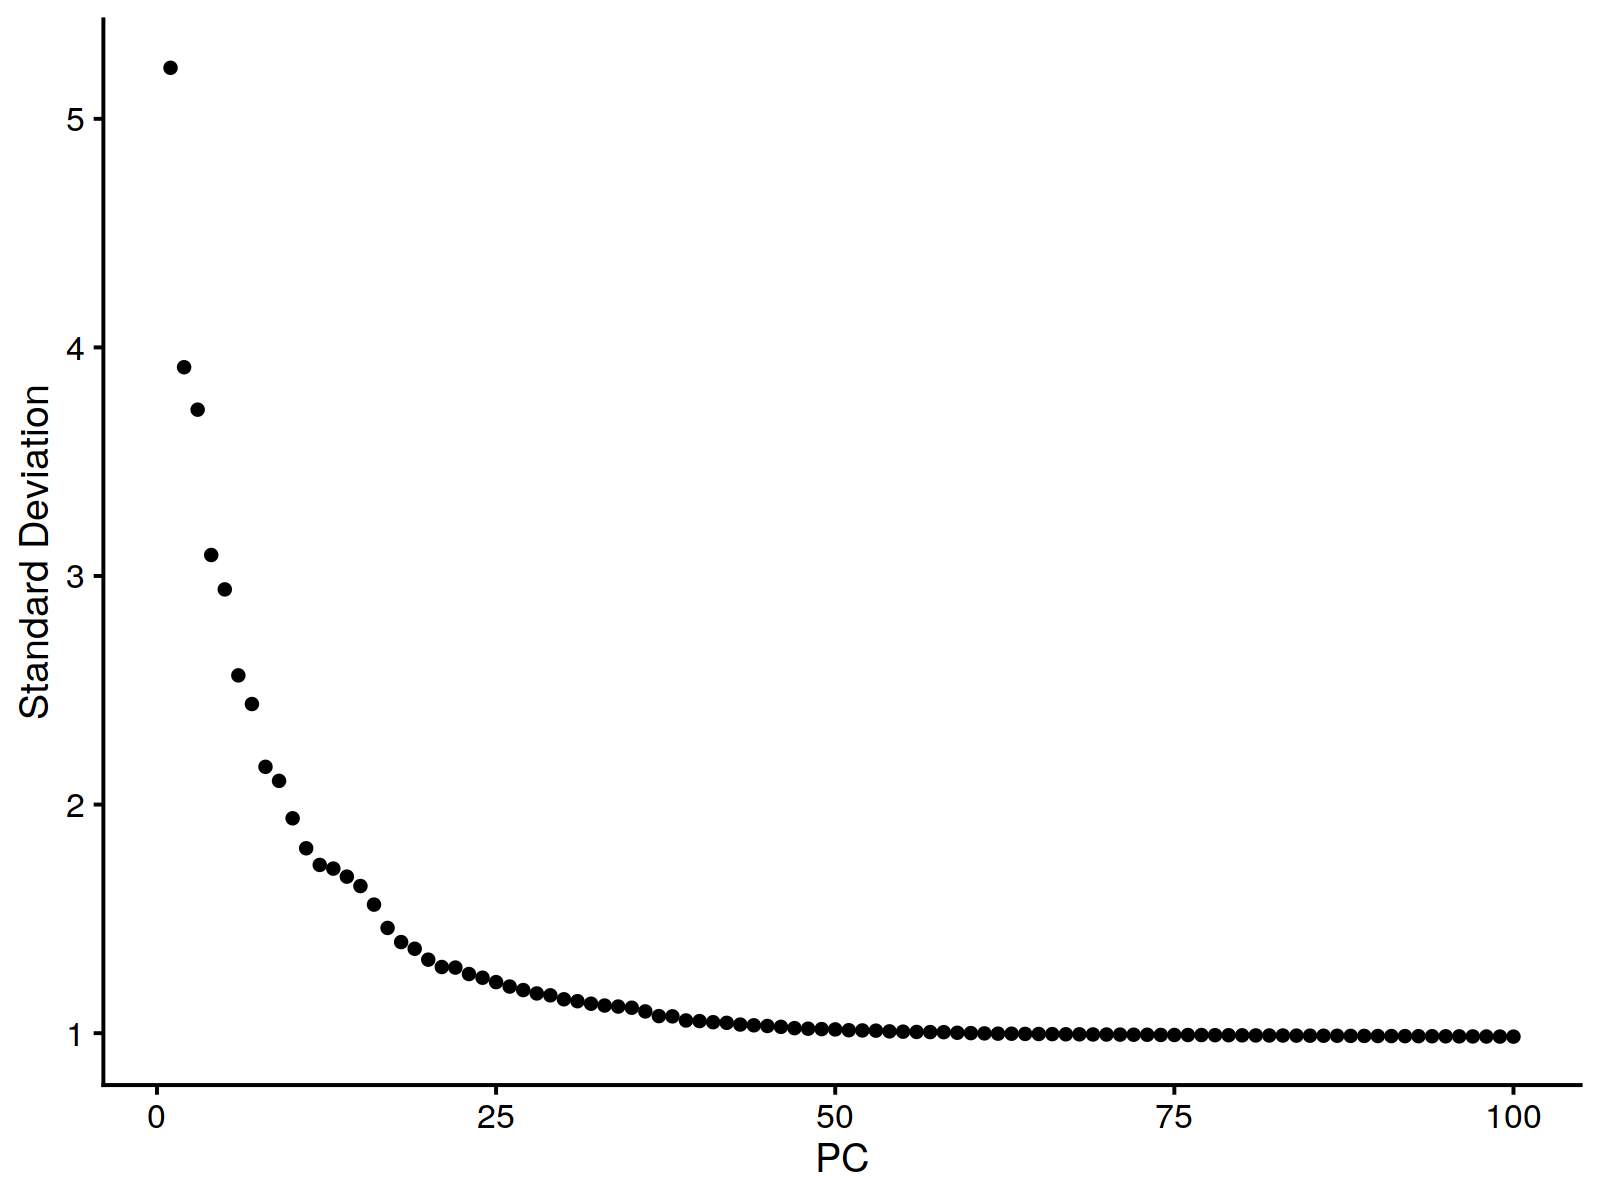

In [54]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 200)
ElbowPlot(dataobj,ndims = 100)

In [55]:
pca_embeddings <- Embeddings(dataobj,reduction = "pca")
var_list <- array(dim = 100)
for(i in 1:100){
    var_list[i] <- var(pca_embeddings[,i])
}
var_ratio_list <- var_list/sum(var_list)

In [80]:
# add covariates
df_anova <- as.data.frame(pca_embeddings)

df_anova$seq_tech <- as.character(dataobj$seq_tech)

df_anova$subregion <- as.character(dataobj$subregion)
df_anova$donor_gender <- as.character(dataobj$donor_gender)


age_int <- lapply(dataobj$donor_age,function(x){gsub("yr","",x)})
age_int[age_int %in% c('21','33')] <- '20-35'
age_int[age_int %in% c('36','39')] <- '35-40'
age_int[age_int %in% c('42','43','45')] <- '40-45'
age_int[age_int %in% c('46','47','48')] <- '45-50'
age_int[age_int %in% c('50','51','52','54')] <- '50-55'
age_int[age_int %in% c('59','60')] <- '55-60'
df_anova$donor_age <- as.character(age_int)

df_anova$MCT <- dataobj$MCT

In [77]:
unique(age_int)

[[1]]
[1] "50-55"

[[2]]
[1] "45-50"

[[3]]
[1] "40-45"

[[4]]
[1] "35-40"

[[5]]
[1] "55-60"

[[6]]
[1] "60-65"

[[7]]
[1] "70-75"

[[8]]
[1] "65-70"

[[9]]
[1] "20-35"

In [213]:
write.csv(df_anova,"explore_variance.csv")

# Load Fetal Data

In [12]:
dataobj <- readRDS("/data3/cyx/ForDatabase0606/Fetal.Heart.integrated.rds")

In [13]:
dataobj

An object of class Seurat 
45878 features across 117361 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

In [14]:
dataobj@active.assay <- "RNA"

In [15]:
dataobj <- FindVariableFeatures(dataobj)
dataobj <- ScaleData(dataobj)

Centering and scaling data matrix



In [16]:
dataobj <- RunPCA(dataobj,npcs = 100)

PC_ 1 
Positive:  EEF1G, MTRNR2L9, CCL5, LINC00504, MTRNR2L2, MTRNR2L8, TOMM6, SHISA9, HMGN2, KRTCAP2 
	   ATP6V0C, UGDH-AS1, MAB21L3, TRAPPC5, UQCR11, FOS, PARP15, IER2, RGS2, ID2 
	   ZFP36, TMBIM4, METTL21A, GADD45B, TOMM5, NDUFA7, JUNB, NDUFB8, OPHN1, PSMA2 
Negative:  HBA2, HBG2, HBA1, HBG1, SLC8A1, ERBB4, H19, FGF12, IGF2, HBB 
	   LINC01505, RBFOX1, IQCJ-SCHIP1, ARL15, KCNH7, MIR924HG, MAGI2, RALYL, DLGAP1, CSMD1 
	   FGF14, ITGB3, LRRC53, XKR4, ZNF804A, NRG3, LINC01019, FAM155A, TAFA1, KCNIP4 
PC_ 2 
Positive:  MT-CO1, MT-CO3, MT-ATP6, MT-RNR2, MT-CYB, MT-ND4, MT-CO2, MT-ND2, MT-ND1, RPS17 
	   MT-ND3, MT-RNR1, MT-ND5, H3-3A, MT-ND4L, RPL10P9, MT-ATP8, RPL10AP6, RPL7P9, MTCO1P12 
	   UQCR11, RPS3AP26, NDUFB8, TMSB4XP4, RPL23AP42, MT-TL1, RPS3AP6, MT-TW, RPL6P27, CSRP2 
Negative:  SLC8A1, FGF12, HBA2, HBG2, ERBB4, HBG1, HBA1, SHISA9, UGDH-AS1, LINC00504 
	   MAB21L3, PARP15, CCL5, OPHN1, MTRNR2L8, L2HGDH, SLC9A4, RBMS3, MTRNR2L2, FOXK1 
	   RBFOX1, MTRNR2L9, INMT, SLC43A2, IGF2,

In [22]:
# add covariates
df_anova <- as.data.frame(Embeddings(dataobj,reduction = "pca"))
df_anova$seq_tech <- as.character(dataobj$seq_tech)
df_anova$subregion <- as.character(dataobj$subregion)
df_anova$donor_gender <- as.character(dataobj$donor_gender)
df_anova$MCT <- dataobj$MCT
df_anova$cell_type <- dataobj$cell_type
df_anova$donor_age <- dataobj$donor_age
df_anova$donor_ID <- dataobj$donor_ID

In [23]:
write.csv(df_anova,"explore_variance_fetal.csv")